# Lead Scoring Case Study

## Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
 

### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

In [829]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [830]:
# As the data is in the same directory as the workbook

In [831]:
pwd

'C:\\Users\\User\\Downloads'

In [832]:
# Reading the Dataset

df=pd.read_csv("Leads.csv")

## Analysing the Dataframe

In [833]:
# Head of the Dataframe

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [834]:
# Shape of dataframe

df.shape

(9240, 37)

In [835]:
# Information about the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [836]:
# Description of the dataframe

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Cleaning the Dataframe

In [837]:
# Finding  the columns that has "Select" values

col=list(df.columns)
test=["Select"]
col1=[]
for i in range(len(col)):
    if len(df[col[i]].isin(test).unique())>1:
        col1.append(col[i])
print(col1)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


'Specialization', 'How did you hear about X Education', 'Lead Profile', 'City' has the word "Select" in them.

In [838]:
# Replacing "Select" with null values

for i in col1:
    df[i]=df[i].replace(["Select"],value=np.nan)

In [839]:
# To check the top 5 values of the columns after replacing "Select" with null values

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [840]:
# Checking for missing vales

round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From above we can see that "Tags","Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity score",'Specialization', 'How did you hear about X Education', 'Lead Profile', 'City' and "Asymmetrique Profile Score" has more than 30% data missing

In [841]:
# Gathering the columns name that has the missing values in the dataframe

df_columns=df.isnull().sum()>0
cols=df_columns[df_columns==True].index
cols

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [842]:
# Checking the datatype of missing values column

df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   TotalVisits                                    9103 non-null   float64
 2   Page Views Per Visit                           9103 non-null   float64
 3   Last Activity                                  9137 non-null   object 
 4   Country                                        6779 non-null   object 
 5   Specialization                                 5860 non-null   object 
 6   How did you hear about X Education             1990 non-null   object 
 7   What is your current occupation                6550 non-null   object 
 8   What matters most to you in choosing a course  6531 non-null   object 
 9   Tags                                           5887 

'Lead Source', 'Last Activity','Country', 'Specialization', 'How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course', 'Tags', 'Lead Quality','Lead Profile', 'City', 'Asymmetrique Activity Index','Asymmetrique Profile Index' are all of datatype object where as the
'Asymmetrique Activity Score','Asymmetrique Profile Score', 'TotalVisits', 'Page Views Per Visit' are of datatype float.

In [843]:
# Replacing null variables for both the object and float datatype with mode and median values respectively

for i in cols:
    if df[i].dtype=="float64":
        df[i]=df[i].fillna(df[i].median())
    elif df[i].dtype=="object":
        df[i]=df[i].fillna(df[i].mode()[0])

In [844]:
# Checking the null values are replaced successfully

df[cols].isnull().sum()

Lead Source                                      0
TotalVisits                                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
Lead Quality                                     0
Lead Profile                                     0
City                                             0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
Asymmetrique Activity Score                      0
Asymmetrique Profile Score                       0
dtype: int64

In [845]:
# Checking the dataframe after replacing of null values

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [846]:
#checking value count of lead Source

df["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

It has same values but in different format like "Google" and "google" we need to make the format same for all the values.

In [847]:
# Capitalize the first character of the values

df["Lead Source"]=df["Lead Source"].apply(lambda x: x.capitalize())
df["Lead Source"].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Live chat               2
Social media            2
Press_release           2
Youtubechannel          1
Testone                 1
Pay per click ads       1
Nc_edm                  1
Blog                    1
Welearnblog_home        1
Welearn                 1
Name: Lead Source, dtype: int64

In [848]:
# Removing the non essential Column "Prospect ID" and "Lead Number"

df.drop(["Prospect ID","Lead Number"],axis=1, inplace=True)

## Data Transformation

In [849]:
# Finding  the columns that has "Yes" and "No" values

col=list(df.columns)
test=["No","Yes"]
col2=[]
for i in range(len(col)):
    if df[col[i]].isin(test).any().any():
        col2.append(col[i])
print(col2)

['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']


The columns are 'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'
are the columns with "Yes" and "No" values.

In [850]:
# Converting the values "Yes" and "No" to respective 1 and 0

for i in col2:
    df[i]=df[i].map({"Yes":1,"No":0})

In [852]:
# Identifying the columns with data type "Object" 

col=[]
for i in df.columns:
    if df[i].dtype=="object":
        col.append(i)
print(col)

['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity']


In [853]:
# Identifying the columns with data type "Object" and creating dummy variables for those columns and droping the first level

for i in df.columns:
    if df[i].dtype=="object":
        dummy=pd.get_dummies(df[i],drop_first=True)
        df=pd.concat([df,dummy],axis=1)
df.shape

(9240, 200)

In [854]:
# Deleting the original columns for which dummy variables are created

df=df.drop(col,1)
df.shape

(9240, 185)

In [855]:
# Examining the information of the dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 185 entries, Do Not Email to View in browser link Clicked
dtypes: float64(4), int64(16), uint8(165)
memory usage: 2.9 MB


## Data Preparation

### Train-Test Split

In [856]:
# Importing train-test method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [857]:
# Separating traget variable "Converted" and putting it in a new series "y"

y=df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [858]:
# Adding the independent variables to series "X"

X=df.drop("Converted",1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [859]:
# Splitting the dataset into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=100)

### Feature Scaling

In [860]:
# Normalization of 'TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score'and 'Asymmetrique Profile Score'

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']
X_train[num_vars]= scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.015936,0.214349,0.024182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.019920,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.019920,0.541373,0.090909,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [861]:
# Checking the conversion rate from "Converted" column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

### Correlation

In [862]:
# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

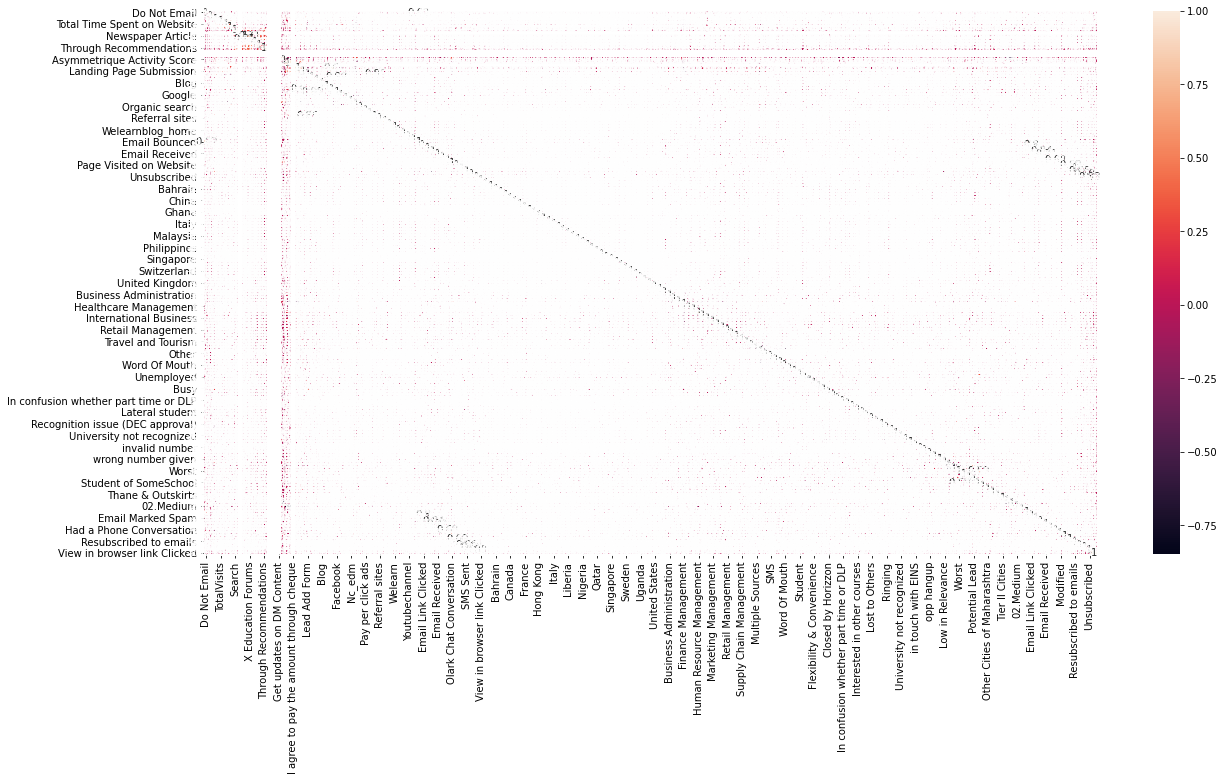

In [863]:
# Let's see the correlation matrix on a heat map

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [864]:
# Checking the correlation matrix

df.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
Do Not Email,1.000000,-0.004322,-0.135580,0.033640,-0.046374,0.033404,-0.011443,NaN,-0.004322,-0.003056,...,-0.003056,-0.011443,0.117259,-0.013032,0.049921,-0.003056,-0.025990,-0.010505,0.243408,-0.003056
Do Not Call,-0.004322,1.000000,0.018581,0.003241,0.006801,-0.005880,-0.000573,NaN,-0.000216,-0.000153,...,-0.000153,-0.000573,0.019252,-0.002092,-0.002778,-0.000153,-0.008157,-0.000867,-0.001052,-0.000153
Converted,-0.135580,0.018581,1.000000,0.029119,0.362483,-0.005068,-0.002261,NaN,0.003465,-0.008238,...,-0.008238,0.043476,-0.244294,-0.072660,-0.036051,0.013138,0.351845,0.036594,-0.012858,-0.008238
TotalVisits,0.033640,0.003241,0.029119,1.000000,0.217341,0.512214,0.049577,NaN,0.033775,0.035756,...,-0.003106,0.022438,-0.106902,-0.037440,0.227865,-0.007424,-0.003163,0.005721,0.001068,0.009848
Total Time Spent on Website,-0.046374,0.006801,0.362483,0.217341,1.000000,0.314266,0.012654,NaN,0.011326,0.006195,...,-0.003810,0.022261,-0.106857,-0.051402,0.026644,-0.009259,0.125076,0.008941,0.000503,-0.007569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Resubscribed to emails,-0.003056,-0.000153,0.013138,-0.007424,-0.009259,-0.011431,-0.000405,NaN,-0.000153,-0.000108,...,-0.000108,-0.000405,-0.007951,-0.001479,-0.001964,1.000000,-0.005767,-0.000613,-0.000744,-0.000108
SMS Sent,-0.025990,-0.008157,0.351845,-0.003163,0.125076,0.056851,-0.015032,NaN,-0.008157,-0.005767,...,-0.005767,-0.021594,-0.423664,-0.078798,-0.104656,-0.005767,1.000000,-0.032679,-0.039637,-0.005767
Unreachable,-0.010505,-0.000867,0.036594,0.005721,0.008941,0.019723,-0.002296,NaN,-0.000867,-0.000613,...,-0.000613,-0.002296,-0.045054,-0.008380,-0.011129,-0.000613,-0.032679,1.000000,-0.004215,-0.000613
Unsubscribed,0.243408,-0.001052,-0.012858,0.001068,0.000503,0.018222,-0.002785,NaN,-0.001052,-0.000744,...,-0.000744,-0.002785,-0.054646,-0.010164,-0.013499,-0.000744,-0.039637,-0.004215,1.000000,-0.000744


## Model Bulding

In [865]:
# Importing Statsmodels.api

import statsmodels.api as sm

In [866]:
# Logestic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                          169
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        18:34:18   Pearson chi2:                 3.49e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              5.771e+15   7.28e+07   7.93e+07      0.000    5.77e+15    5.77e+15
Do Not Email                                       -2.01e+14   4.49e+06  -4.47e+07      0.000   -2.01e+14   -2.01e+14
Do Not Call                                         9.28e+15   4.79e+07   1.94e+08      0.000    9.28e+15    9.28e+15
TotalVisits                                        1.823e+15   4.76e+07   3.83e+07      0.000    1.82e+15    1.82e+15
Total Time Spent on Website                        1.079e+15   4.06e+06   2.66e+08      0.000    1.08e+15    1.08e+15
Page Views Per Visit                              -1.188e+15   3.05e+07   -3.9e+07      0.000   -1.19e+15   -1.19e+15
Search                                             7.445e+14   2.21e+07   3.36e+07      0.000    7.45e+14    7.45e+14
Magazine                                            1.15e+07      0.645   1.78e+07      0.000    1.15e+07    1.15e+07
Newspaper Article                                   2.43e+15   6.74e+07   3.61e+07      0.000    2.43e+15    2.43e+15
X Education Forums                                 6.804e+15   1.12e+08   6.09e+07      0.000     6.8e+15     6.8e+15
Newspaper                                           8.94e+14   6.73e+07   1.33e+07      0.000    8.94e+14    8.94e+14
Digital Advertisement                             -1.238e+16   4.82e+07  -2.57e+08      0.000   -1.24e+16   -1.24e+16
Through Recommendations                            7.317e+14   2.87e+07   2.55e+07      0.000    7.32e+14    7.32e+14
Receive More Updates About Our Courses            -4.028e+07      2.258  -1.78e+07      0.000   -4.03e+07   -4.03e+07
Update me on Supply Chain Content                 -4.444e+06      0.249  -1.78e+07      0.000   -4.44e+06   -4.44e+06
Get updates on DM Content                          4.252e+07      2.383   1.78e+07      0.000    4.25e+07    4.25e+07
Asymmetrique Activity Score                        2.815e+15   1.89e+07   1.49e+08      0.000    2.81e+15    2.81e+15
Asymmetrique Profile Score                         2.664e+14   1.24e+07   2.16e+07      0.000    2.66e+14    2.66e+14
I agree to pay the amount through cheque          -4.786e+07      2.683  -1.78e+07      0.000   -4.79e+07   -4.79e+07
A free copy of Mastering The Interview             4.413e+13   2.82e+06   1.57e+07      0.000    4.41e+13    4.41e+13
Landing Page Submission                           -3.385e+14   3.37e+06     -1e+08      0.000   -3.38e+14   -3.38e+14
Lead Add Form                                      3.978e+14    1.3e+07   3.06e+07      0.000    3.98e+14    3.98e+14
Lead Import                                        1.366e+15   4.97e+07   2.75e+07      0.000    1.37e+15    1.37e+15
Quick Add Form 

From the above summary presented by generalizing linear model, there are many variable with insignificant p-value.

### Feature Selection Using RFE

In [867]:
# Importing the necessary liberies for RFE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

In [868]:
# Running rfe to only keep 15 variables

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [869]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,

In [870]:
# List of the independent variables that are selected or rejected along with there ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 12),
 ('Do Not Call', False, 98),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 52),
 ('Search', False, 73),
 ('Magazine', False, 161),
 ('Newspaper Article', False, 61),
 ('X Education Forums', False, 87),
 ('Newspaper', False, 128),
 ('Digital Advertisement', False, 67),
 ('Through Recommendations', False, 66),
 ('Receive More Updates About Our Courses', False, 164),
 ('Update me on Supply Chain Content', False, 159),
 ('Get updates on DM Content', False, 163),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 29),
 ('I agree to pay the amount through cheque', False, 168),
 ('A free copy of Mastering The Interview', False, 120),
 ('Landing Page Submission', False, 30),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 152),
 ('Quick Add Form', False, 102),
 ('Blog', False, 75),
 ('Click2call', False, 70),
 ('Direct traffic', False, 78),
 ('Facebook', False, 88),
 ('G

In [871]:
# Adding the accepted variables to "col"

col = X_train.columns[rfe.support_]

In [872]:
# The rejected independent variables

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement',
       ...
       'Form Submitted on Website', 'Had a Phone Conversation', 'Modified',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Resubscribed to emails', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked'],
      dtype='object', length=169)

##### Assessing the model with StatsModels

In [873]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1570.7
Date:                Tue, 14 Sep 2021   Deviance:                       3141.3
Time:                        18:34:54   Pearson chi2:                 1.41e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -6.2681      0.426    -14.697      0.000      -7.104      -5.432
Total Time Spent on Website             4.1773      0.200     20.888      0.000       3.785       4.569
Asymmetrique Activity Score             4.2932      0.498      8.612      0.000       3.316       5.270
Lead Add Form                           2.2100      0.271      8.158      0.000       1.679       2.741
Welingak website                        2.5964      0.779      3.333      0.001       1.070       4.123
SMS Sent                                0.5461      0.161      3.397      0.001       0.231       0.861
SMS Sent                                2.3808      0.181     13.145      0.000       2.026       2.736
Working Professional                    2.5542      0.258      9.884      0.000       2.048       3.061
Busy                                    3.3917      0.292     11.603      0.000       2.819       3.965
Closed by Horizzon                      9.5286      1.049      9.080      0.000       7.472      11.585
Lateral student                        25.7684   1.47e+04      0.002      0.999   -2.89e+04    2.89e+04
Lost to EINS                            9.7138      0.757     12.825      0.000       8.229      11.198
Will revert after reading the email     4.8338      0.217     22.265      0.000       4.408       5.259
in touch with EINS                      4.3223      1.107      3.905      0.000       2.153       6.491
Might be                               -3.6810      0.215    -17.154      0.000      -4.102      -3.260
Not Sure                               -2.2551      0.281     -8.022      0.000      -2.806      -1.704
Worst                                  -3.6105      0.756     -4.774      0.000      -5.093      -2.128
=======================================================================================================
"""

In [874]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred

1871    0.004492
6795    0.184239
3516    0.000891
8105    0.116213
3934    0.084456
          ...   
350     0.980121
79      0.999363
8039    0.119941
6936    0.001136
5640    0.084456
Length: 6468, dtype: float64

In [875]:
# Reshaping it into array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.004492  , 0.18423922, 0.00089104, ..., 0.11994074, 0.00113551,
       0.08445632])

In [876]:
# Creating a dataframe with the actual Converted Lead flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_Prob,CustID
0,0,0.004492,1871
1,0,0.184239,6795
2,0,0.000891,3516
3,0,0.116213,8105
4,0,0.084456,3934


In [877]:
# Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head

y_train_pred_final.head()

,Lead,Lead_Prob,CustID,predicted
0,0,0.004492,1871,0
1,0,0.184239,6795,0
2,0,0.000891,3516,0
3,0,0.116213,8105,0
4,0,0.084456,3934,0


In [878]:
# Confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[3767  235]
 [ 352 2114]]


In [879]:
# Predicted     not_lead    lead
# Actual
# not_lead        3767      235
# lead            352       2114  

In [880]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9092455163883735


### Checking VIFs

In [881]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [882]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Asymmetrique Activity Score,13.03
13,Might be,6.57
4,SMS Sent,5.33
5,SMS Sent,4.92
11,Will revert after reading the email,4.11
14,Not Sure,2.35
0,Total Time Spent on Website,1.95
15,Worst,1.79
2,Lead Add Form,1.68
8,Closed by Horizzon,1.53


The variable 'Asymmetrique Activity Score' has the highest VIF. Let's start by dropping that.

In [883]:
# Droping "Asymmetrique Activity Score"

col = col.drop('Asymmetrique Activity Score', 1)
col

Index(['Total Time Spent on Website', 'Lead Add Form', 'Welingak website',
       'SMS Sent', 'Working Professional', 'Busy', 'Closed by Horizzon',
       'Lateral student', 'Lost to EINS',
       'Will revert after reading the email', 'in touch with EINS', 'Might be',
       'Not Sure', 'Worst'],
      dtype='object')

In [884]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1608.1
Date:                Tue, 14 Sep 2021   Deviance:                       3216.1
Time:                        18:34:55   Pearson chi2:                 1.76e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.4609      0.258    -13.394      0.000      -3.967      -2.954
Total Time Spent on Website             3.9204      0.193     20.325      0.000       3.542       4.298
Lead Add Form                           2.1334      0.269      7.940      0.000       1.607       2.660
Welingak website                        2.5392      0.775      3.275      0.001       1.019       4.059
SMS Sent                                0.4227      0.156      2.718      0.007       0.118       0.728
SMS Sent                                2.3915      0.177     13.485      0.000       2.044       2.739
Working Professional                    2.5448      0.255      9.981      0.000       2.045       3.045
Busy                                    3.4452      0.287     11.997      0.000       2.882       4.008
Closed by Horizzon                      9.6315      1.047      9.203      0.000       7.580      11.683
Lateral student                        25.8650   1.49e+04      0.002      0.999   -2.91e+04    2.92e+04
Lost to EINS                            9.6553      0.755     12.786      0.000       8.175      11.135
Will revert after reading the email     4.9370      0.216     22.873      0.000       4.514       5.360
in touch with EINS                      3.9736      1.014      3.917      0.000       1.985       5.962
Might be                               -3.6168      0.211    -17.164      0.000      -4.030      -3.204
Not Sure                               -2.1828      0.277     -7.874      0.000      -2.726      -1.639
Worst                                  -3.4960      0.750     -4.662      0.000      -4.966      -2.026
=======================================================================================================
"""

In [885]:
# Reshaping it into array

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.00352729, 0.21409978, 0.00101203, ..., 0.10520247, 0.00127057,
       0.10520247])

In [886]:
# Updating the new predicted variable to the column "Lead_Prob"

y_train_pred_final['Lead_Prob'] = y_train_pred

In [887]:
# Updating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,CustID,predicted
0,0,0.003527,1871,0
1,0,0.214100,6795,0
2,0,0.001012,3516,0
3,0,0.105163,8105,0
4,0,0.105202,3934,0


In [888]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9047619047619048


###  Checking the VIFs again

In [889]:
# Dataframe that contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,SMS Sent,5.33
4,SMS Sent,4.92
10,Will revert after reading the email,3.03
12,Might be,2.75
0,Total Time Spent on Website,1.85
1,Lead Add Form,1.64
7,Closed by Horizzon,1.32
13,Not Sure,1.27
2,Welingak website,1.25
5,Working Professional,1.21


In [890]:
# Let's drop Lateral student since it has a high P value

col = col.drop('Lateral student')
col

Index(['Total Time Spent on Website', 'Lead Add Form', 'Welingak website',
       'SMS Sent', 'Working Professional', 'Busy', 'Closed by Horizzon',
       'Lost to EINS', 'Will revert after reading the email',
       'in touch with EINS', 'Might be', 'Not Sure', 'Worst'],
      dtype='object')

In [891]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1618.7
Date:                Tue, 14 Sep 2021   Deviance:                       3237.5
Time:                        18:34:55   Pearson chi2:                 1.79e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.3485      0.253    -13.212      0.000      -3.845      -2.852
Total Time Spent on Website             3.8983      0.192     20.294      0.000       3.522       4.275
Lead Add Form                           2.1674      0.268      8.076      0.000       1.641       2.693
Welingak website                        2.4976      0.775      3.221      0.001       0.978       4.017
SMS Sent                                0.4625      0.155      2.991      0.003       0.159       0.766
SMS Sent                                2.3452      0.176     13.313      0.000       2.000       2.690
Working Professional                    2.5240      0.254      9.956      0.000       2.027       3.021
Busy                                    3.3942      0.285     11.913      0.000       2.836       3.953
Closed by Horizzon                      9.5178      1.045      9.105      0.000       7.469      11.567
Lost to EINS                            9.5549      0.754     12.679      0.000       8.078      11.032
Will revert after reading the email     4.8289      0.210     23.001      0.000       4.417       5.240
in touch with EINS                      3.8727      1.014      3.820      0.000       1.886       5.860
Might be                               -3.6184      0.210    -17.262      0.000      -4.029      -3.208
Not Sure                               -2.2542      0.274     -8.221      0.000      -2.792      -1.717
Worst                                  -3.5757      0.743     -4.814      0.000      -5.032      -2.120
=======================================================================================================
"""

In [892]:
# Reshaping into an array

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.00367453, 0.21376439, 0.00112936, ..., 0.10546059, 0.00141601,
       0.10546059])

In [893]:
# Updating the "Lead_Prob" with new value

y_train_pred_final['Lead_Prob'] = y_train_pred

In [894]:
# Updating column 'predicted' with 1 if Lead_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,CustID,predicted
0,0,0.003675,1871,0
1,0,0.213764,6795,0
2,0,0.001129,3516,0
3,0,0.114186,8105,0
4,0,0.105461,3934,0


In [895]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9059987631416203


### Let's check the VIFs again

In [896]:
# Dataframe that contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,SMS Sent,5.31
4,SMS Sent,4.91
9,Will revert after reading the email,3.03
11,Might be,2.75
0,Total Time Spent on Website,1.85
1,Lead Add Form,1.64
7,Closed by Horizzon,1.32
12,Not Sure,1.27
2,Welingak website,1.25
5,Working Professional,1.21


In [897]:
# Let's drop SMS Sent since it has a high VIF

col = col.drop('SMS Sent')
col

Index(['Total Time Spent on Website', 'Lead Add Form', 'Welingak website',
       'Working Professional', 'Busy', 'Closed by Horizzon', 'Lost to EINS',
       'Will revert after reading the email', 'in touch with EINS', 'Might be',
       'Not Sure', 'Worst'],
      dtype='object')

In [898]:
# Let's re-run the model using the selected variables

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.2
Date:                Tue, 14 Sep 2021   Deviance:                       3976.4
Time:                        18:34:56   Pearson chi2:                 1.41e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.8457      0.231    -12.322      0.000      -3.298      -2.393
Total Time Spent on Website             4.1692      0.174     23.977      0.000       3.828       4.510
Lead Add Form                           2.7996      0.248     11.295      0.000       2.314       3.285
Welingak website                        2.1674      0.758      2.860      0.004       0.682       3.653
Working Professional                    2.7685      0.221     12.550      0.000       2.336       3.201
Busy                                    3.3723      0.266     12.657      0.000       2.850       3.894
Closed by Horizzon                      8.4796      1.042      8.134      0.000       6.436      10.523
Lost to EINS                            8.5898      0.753     11.400      0.000       7.113      10.067
Will revert after reading the email     4.4321      0.198     22.377      0.000       4.044       4.820
in touch with EINS                      3.3467      0.852      3.927      0.000       1.676       5.017
Might be                               -3.0925      0.192    -16.072      0.000      -3.470      -2.715
Not Sure                               -1.3031      0.249     -5.230      0.000      -1.792      -0.815
Worst                                  -3.7062      0.682     -5.432      0.000      -5.043      -2.369
=======================================================================================================
"""

In [899]:
# Reshaping into an array

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.01553701, 0.35149275, 0.00319255, ..., 0.18151121, 0.00406401,
       0.18151121])

In [900]:
# Updating the "Lead_Prob" with new value

y_train_pred_final['Lead_Prob'] = y_train_pred

In [901]:
# Updating column 'predicted' with 1 if Lead_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,CustID,predicted
0,0,0.015537,1871,0
1,0,0.351493,6795,0
2,0,0.003193,3516,0
3,0,0.024574,8105,0
4,0,0.181511,3934,0


In [902]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.8812615955473099


### Let's check the VIFs again

In [903]:
# Dataframe that contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Will revert after reading the email,3.00
9,Might be,2.64
0,Total Time Spent on Website,1.80
1,Lead Add Form,1.59
5,Closed by Horizzon,1.30
2,Welingak website,1.25
3,Working Professional,1.19
10,Not Sure,1.19
4,Busy,1.12
6,Lost to EINS,1.06


From the above Summary and VIF we can conclude that all the varibles present in this model are significat as no variable has P value greater than 5% and the VIF is also less than 5 and the model accuracy is 88%.

## Other Metrics

In [904]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [905]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8572587185725872

In [906]:
# Let us calculate specificity

TN / float(TN+FP)

0.94127936031984

In [907]:
# Calculate false postive rate

print(FP/ float(TN+FP))

0.05872063968015992


In [908]:
# positive predictive value 

print (TP / float(TP+FP))

0.8999574286930608


In [909]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9145423646516144


### Plotting the ROC Curve

In [910]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [911]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

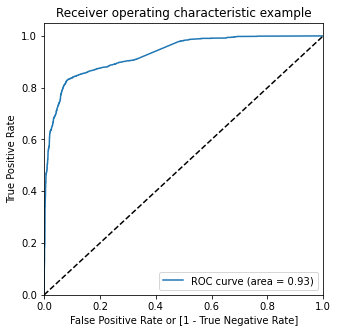

In [912]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

Points to be concluded from the above ROC curve:

-- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.

-- The area under the curve is 93% of the total area

### Finding Optimal Cutoff Point

In [913]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015537,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.351493,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.003193,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.024574,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.181511,3934,0,1,1,0,0,0,0,0,0,0,0


We will check the "Accuracy", "Sensitivity" and "Specificity" for all the points from 0 to 0.9 and select the optimum point for our model

In [914]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.686766  0.980941  0.505497
0.2   0.2  0.781231  0.903082  0.706147
0.3   0.3  0.860080  0.854420  0.863568
0.4   0.4  0.883890  0.828467  0.918041
0.5   0.5  0.881262  0.796026  0.933783
0.6   0.6  0.868893  0.744120  0.945777
0.7   0.7  0.857452  0.680049  0.966767
0.8   0.8  0.824366  0.565693  0.983758
0.9   0.9  0.793599  0.470803  0.992504


From above data we have we analyse points for accurcy, sensitivity and specificity for all probability points from 0 to 0.9, out of which we chose the "cutoff probability =0.3" because of its accuracy sensitivity and specificity value.

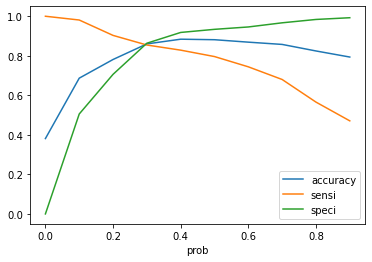

In [916]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve "0.3" is the optimum point for taking probability cutoff as the meeting point is near 0.3. We also see there is a tradeoff between sensitivity and specificity as one decreases the other increases.

In [781]:
# Predicting the outcomes with the probability cutoff as 0.3 by creating a new column in the final dataset

y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.015537,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.351493,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.003193,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.024574,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.181511,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [782]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.8600803957946815

In [783]:
# Final confusion matrics

confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[3456,  546],
       [ 359, 2107]], dtype=int64)

In [784]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [785]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8544201135442011

In [786]:
# Let us calculate specificity

TN / float(TN+FP)

0.863568215892054

In [787]:
# Calculate false postive rate

print(FP/ float(TN+FP))

0.136431784107946


In [788]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7941952506596306


In [789]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9058977719528178


### Precision and Recall

In [790]:
# Precision

TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8999574286930608

In [791]:
# Recall

TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8572587185725872

The important points to be noted form above outcome are:

1) The overall accuracy of the model is "86%"

2) The sensitivity of the model is "85%"

3) The false postive rate of the model is "14%"

4) The Positive predictive value is "79%"

5) The Negative predictive value is"91%"

6) The Presision of the model is "90%"

7) The Recall/specificity of the model is "86%"


As per the business model we are focusing on the recall percentage(86%) as we don't wnat to leave any hot leads which are willing to get converted.

### Precision and recall tradeoff

We need to check the tradeoff between the Precision and Recall as one increases the other decreases.

In [792]:
# Importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

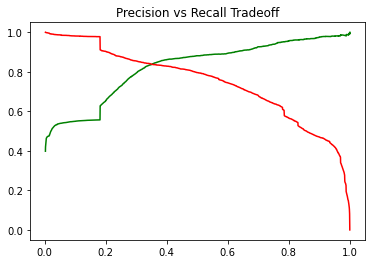

In [793]:
# Creating the precision and recall curve

y_train_pred_final.Lead, y_train_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)
plt.title("Precision vs Recall Tradeoff")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

We can see there is Precision and Recall tradeoff at the point near 0.4

### Making predictions on the test set

In [794]:
# Normalization of 'TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score'and 'Asymmetrique Profile Score' of test data

num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']
X_test[num_vars]= scaler.transform(X_test[num_vars])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
4269,0,0,0.031873,0.444982,0.145455,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0,0,0.019920,0.025968,0.090909,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [795]:
# Predicting the test dataset with our final model

X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)  # Making predictions on the test set
y_pred_1 = pd.DataFrame(y_test_pred)   # Converting y_pred to a dataframe which is an array
y_pred_1.head()  # Let's see the head

,0
4269,0.586392
2376,0.987703
7766,0.797486
9199,0.015537
4359,0.987703


In [796]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Putting CustID to index 

y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True) 
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)  

# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Lead'}) 

# Let's see the head of y_pred_final

y_pred_final.head()   

,Lead,CustID,Lead_Prob
0,1,4269,0.586392
1,1,2376,0.987703
2,1,7766,0.797486
3,0,9199,0.015537
4,1,4359,0.987703


In [797]:
# Predicting the outcome with probability cutoff as 0.3 by creating new columns in the final test dataset

y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Lead,CustID,Lead_Prob,final_predicted
0,1,4269,0.586392,1
1,1,2376,0.987703,1
2,1,7766,0.797486,1
3,0,9199,0.015537,0
4,1,4359,0.987703,1


In [798]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Lead, y_pred_final.final_predicted)

0.8596681096681097

In [806]:
# Creating the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Lead, y_pred_final.final_predicted )
confusion2

array([[1435,  242],
       [ 147,  948]], dtype=int64)

In [807]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [808]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8657534246575342

In [809]:
# Let us calculate specificity

TN / float(TN+FP)

0.8556946929039952

In [810]:
# Precision

TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8999574286930608

In [811]:
# Recall

TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8572587185725872

The important points to be noted form above outcome are:

1) The overall accuracy of the model is "86%"

2) The sensitivity of the model is "87%"

3) The Presision of the model is "90%"

4) The Recall/specificity of the model is "86%"


## Lead Score assigning

In [814]:
# reading the actual dataframe again

df=pd.read_csv("Leads.csv")

In [826]:
# Creating new columns for lead number and lead score

y_pred_final["Lead Number"]=y_pred_final["CustID"].apply(lambda x: df.iloc[int(x)][1])
y_pred_final["Lead Score"]=y_pred_final["Lead_Prob"].apply(lambda x:round(x*100))
y_pred_final.head()

,Lead,CustID,Lead_Prob,final_predicted,Lead Number,Lead Score
0,1,4269,0.586392,1,619003,59
1,1,2376,0.987703,1,636884,99
2,1,7766,0.797486,1,590281,80
3,0,9199,0.015537,0,579892,2
4,1,4359,0.987703,1,617929,99


## Conclusion

Valuable Insights-

1) The accuracy, Precision and Recall score we got from test set is in acceptable range.

2) In Business terms this model has the potential to be updated based on companies future requirements.

3) Thus the model is in a stable state

4) Important featuers responsible for good conversion rate or the ones whcih contributes more towards the probability of a lead    getting converted are:

   -- "Closed by Horizzon"
   
   -- "Lost to EINS"
   
   --"Will revert after reading the email"